In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [7]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
X=data.data
y=data.target

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
lr_report = classification_report(y_test,y_pred,output_dict=True)
lr_report

{'0': {'precision': 0.9761904761904762,
  'recall': 0.9534883720930233,
  'f1-score': 0.9647058823529412,
  'support': 43.0},
 '1': {'precision': 0.9722222222222222,
  'recall': 0.9859154929577465,
  'f1-score': 0.9790209790209791,
  'support': 71.0},
 'accuracy': 0.9736842105263158,
 'macro avg': {'precision': 0.9742063492063492,
  'recall': 0.9697019325253848,
  'f1-score': 0.9718634306869601,
  'support': 114.0},
 'weighted avg': {'precision': 0.9737190197716513,
  'recall': 0.9736842105263158,
  'f1-score': 0.973621425014614,
  'support': 114.0}}

In [26]:
lr_acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
lr_acc

0.9736842105263158

In [27]:
lr_report_df = pd.DataFrame(lr_report).transpose()
lr_report_df

,precision,recall,f1-score,support
0,0.976190,0.953488,0.964706,43.000000
1,0.972222,0.985915,0.979021,71.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974206,0.969702,0.971863,114.000000
weighted avg,0.973719,0.973684,0.973621,114.000000


Text(50.722222222222214, 0.5, 'actual')

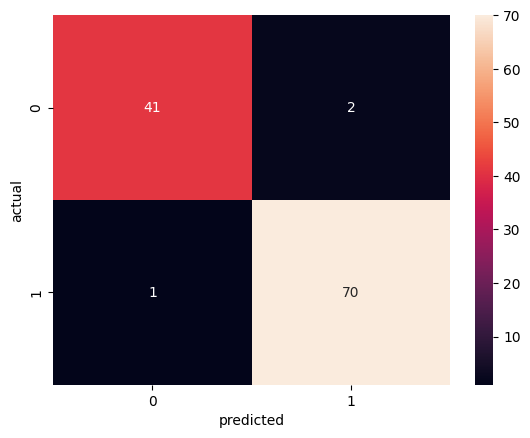

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [32]:
rf_report = classification_report(y_test,rf_pred,output_dict=True)
rf_report

{'0': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809523,
  'support': 43.0},
 '1': {'precision': 0.958904109589041,
  'recall': 0.9859154929577465,
  'f1-score': 0.9722222222222222,
  'support': 71.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9672569328433009,
  'recall': 0.9580740255486406,
  'f1-score': 0.9623015873015872,
  'support': 114.0},
 'weighted avg': {'precision': 0.9652053622194477,
  'recall': 0.9649122807017544,
  'f1-score': 0.9647382344750765,
  'support': 114.0}}

In [33]:
rf_report_df = pd.DataFrame(rf_report).transpose()
rf_report_df

,precision,recall,f1-score,support
0,0.975610,0.930233,0.952381,43.000000
1,0.958904,0.985915,0.972222,71.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.967257,0.958074,0.962302,114.000000
weighted avg,0.965205,0.964912,0.964738,114.000000
